In [1]:
import idx2numpy
import scipy
from scipy import ndimage
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pylab import rcParams
from bokeh.plotting import figure, show, output_file
rcParams['figure.figsize'] = 10, 5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from PIL import Image
# from StringIO import StringIO
import base64
import pprint
from sklearn.decomposition import RandomizedPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import RandomizedPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

print(np.version.version)

1.9.2


# Load images

In [2]:
images = idx2numpy.convert_from_file(open('train-images.idx3-ubyte', 'rb'))
labels = idx2numpy.convert_from_file(open('train-labels.idx1-ubyte', 'rb'))

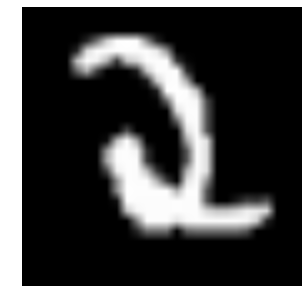

NUMBER
2


In [3]:
def Show(n):
    plt.imshow(images[n], cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    print ("NUMBER")
    print (labels[n])
    
Show(400)

# Vectorize images

In [4]:
vectorized_images = []
for im in images:
    b=[]
    for row in im:
        for d in row:
            b.append(d)
    vectorized_images.append(b)
    


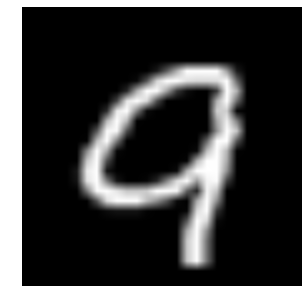

In [5]:
def imageFromVector( vec ):
    l = int(np.sqrt( len(vec) ))
    I = np.zeros((l,l))
    k = 0
    for i in range(0,l):
        for j in range(0,l):
            I[i,j] = vec[k]
            k+=1
            
    return I
            
I = imageFromVector(vectorized_images[3000] )
plt.imshow( I, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# group images per labels

In [6]:
images_bank = dict()
for i in range(0,10):
    images_bank[i] = []
    
for i in range(0,len(labels)):
    images_bank[labels[i]].append(vectorized_images[i]  )

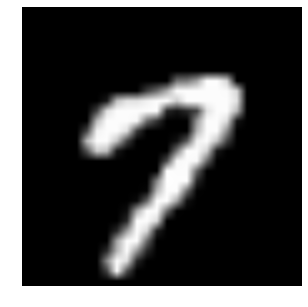

In [7]:
I = imageFromVector(images_bank[7][0] )
plt.imshow( I, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# group all vectors

In [8]:
M_vecs = dict()
print (len(vectorized_images[0]))
for i in range(0,10):
    M_vecs[i] = np.vstack( [v for v in images_bank[i]] ).transpose()

784


# perform PCA

In [9]:
from sklearn.decomposition import FastICA, PCA

NB_COMPONENTS = 2

def getPCAvec(i):
    # I = imageFromVector(images_bank[i][1] )
    # plt.imshow( I, cmap=plt.cm.gray)
    # plt.axis('off')
    # plt.show()

    pca = PCA(n_components = NB_COMPONENTS)
    pca.fit(M_vecs[i])
    vecs_pca = pca.fit_transform(M_vecs[i])

    vecs_restored = pca.inverse_transform(vecs_pca).transpose()
#     print (vecs_restored.shape)
#     print (vecs_pca.shape)

#     result = vecs_pca.transpose() # displays componements
    result = vecs_restored[:,:] # displays images from componements
    return result



def getInterpolationLin(a,b,t):
    return (1-t) * a + t * b

In [ ]:
max_images = 300

def savePCAforDigits(ii):
    result = getPCAvec(ii)


    all_vecs = []
    for i in range( 0, result.shape[0]):
        vec = []
        for j in range(0,result.shape[1]):
            vec.append( result[i,j])
        all_vecs.append(vec)
        
    k = 0
    for v in all_vecs:
        if k < max_images:
            my_dpi = 1
            I=imageFromVector( v )
            fig = plt.figure(frameon=False)
            fig.set_size_inches(28/my_dpi,28/my_dpi)
            ax = plt.Axes(fig, [0., 0., 1., 1.])
            ax.set_axis_off()
            fig.add_axes(ax)

            ax.imshow( I, cmap=plt.cm.gray, aspect='normal')
            plt.axis('off')
            fig.add_axes(ax)
            plt.savefig( 'pca/' + str(ii) + '_' + str(k), dpi=my_dpi)
            plt.close(fig) 
            k += 1
            print k,

In [ ]:
i=5
while i<10:
    savePCAforDigits(i)
    print '==='
    i+=1

In [ ]:
result = getPCAvec(7)

print type(result)

all_vecs = []
for i in range( 0, result.shape[0]):
    vec = []
    for j in range(0,result.shape[1]):
        vec.append( result[i,j])
    all_vecs.append(vec)
    
print (len(all_vecs))

In [ ]:
# print len(all_vecs)
# for v in all_vecs:
#     I=imageFromVector( v )
#     plt.imshow( I, cmap=plt.cm.gray)
#     plt.axis('off')
#     plt.show()

In [ ]:
from ipywidgets import interact
import numpy as np

a = getPCAvec(3)
b = getPCAvec(8)

def dispInter(t):
    v = getInterpolationLin( a,b , float(t)/10.0)
    vec = []
    for j in range(0,v.shape[1]):
        vec.append( v[0,j])
    I=imageFromVector( vec )
    plt.imshow( I, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    
interact( dispInter, t= (0,10) )

In [ ]:
data_test = []
range_t = np.arange(0,1,0.02)
print range_t
for i in range(0,10):
    print i,
    tmp = []
    a = getPCAvec(i)
    for j in range(0,10):
        tmp2 = []
        b = getPCAvec(j)
        
        for t in range_t:
            v = getInterpolationLin(a,b,t) 
            vec = []
            for j in range(0,v.shape[1]):
                vec.append( v[0,j])
            tmp2.append( vec )
        tmp.append(tmp2)
    data_test.append(tmp)        

In [ ]:
vec = data_test[0][1][7]
I=imageFromVector( vec )
plt.imshow( I, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [ ]:
import pickle
pickle.dump( data_test, open( "data_test.p", "wb" ) )
data_test = pickle.load( open( "data_test.p", "rb" ) )

In [ ]:
import random
len_test = 200
indices_test = []
for k in range(len_test):
    tmp = []
    i = int(random.random()*10)
    j = int(random.random()*10)
    while j == i:
        j = int(random.random()*10)
    t = random.choice( np.arange( 1, 9, 0.2) )
    tmp.append(i)
    tmp.append(j)
    tmp.append(t)
    indices_test.append(tmp)
    
index = int(0)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import random
from IPython.display import clear_output
import time

results = []
times = []
refs = []

button1 = widgets.Button(description="choice 1")
button2 = widgets.Button(description="choice 2")
display(widgets.HBox((button1, button2)))
pickle.dump( 0, open( "index.p", "wb" ) )

def view_image(i,j,t):
    vec = data_test[i][j][t]
    I=imageFromVector( vec )
    plt.imshow( I, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()



def button_action():
    index = pickle.load( open( "index.p", "rb" ) )
    dat = indices_test[index]
    clear_output()
    print str(dat[0]) + "  or  " + str(dat[1]) + "  ?"
    view_image(dat[0], dat[1], dat[2])
    refs.append(index)
    times.append( time.time() )
    index+=1
    pickle.dump( index, open( "index.p", "wb" ) )
    
def on_button_clicked1(b):
    button_action()
    results.append(0)
    
def on_button_clicked2(b):
    button_action()
    results.append(1)
    
button1.on_click(on_button_clicked1)
button2.on_click(on_button_clicked2)


In [ ]:
print times
print results
print refs

In [ ]:
offset_times = []

for i in range(1, len(times)):
    offset_times.append( times[i] - times[i-1])
    
trues = []
offset = []
for k in range(len(results[1:])):
    if ( indices_test[k][2] < 5 and results[k] == 0) or ( indices_test[k][2] > 5 and results[k] == 1) :
        trues.append(1)
    else:
        trues.append(0)  
    offset.append( 5 - abs(5 - indices_test[k][2]) )

print offset

In [ ]:
x = dict()
x_t = dict()
for i in range(0,5):
    x[i] = []
    x_t[i] = []

for i in range(len(offset)):
    t = offset[i]
    x[t].append(trues[i])
    x_t[t].append(offset_times[i])
    
keys_to_remove = []
for t in x:
    if len(x[t]):
        x[t] = float(sum(x[t]))/float(len(x[t]))
        x_t[t] =float(sum(x_t[t]))/float(len(x_t[t]))
    else:
        keys_to_remove.append(t)
        
for k in keys_to_remove:
    x.pop(k)
    x_t.pop(k)

print x

plt.plot(x.keys(), x.values())
plt.show()
plt.plot(x_t.keys(), x_t.values())
plt.show()

# ICA

In [23]:
import  PIL
from PIL import Image
import numpy as np

def vectorizeImage( im ):
    b=[]
    for row in im:
        for d in row:
            b.append(d)
    return b


def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    gray = np.zeros( (data.shape[0], data.shape[1]) )
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            gray[i,j] = data[i,j,0]
    return gray

In [30]:
#load pca 
root = 'pca/'
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(root)]

P_vecs = dict()
for k in range(10):
    P_vecs[k] = []
    
for f in files:
    path = root + f
    im = load_image( path )
    v = vectorizeImage( im )
    P_vecs[int(f[0])].append(v)
    
for k in range(10):
    tmp = P_vecs[k]
    P_vecs[k] = np.vstack( tmp )

print P_vecs[0].shape
# print M_vecs[0]
# vectorized_images = []
# for im in images:
#     b=[]
#     for row in im:
#         for d in row:
#             b.append(d)
#     vectorized_images.append(b)

(300L, 784L)


In [52]:
NB_COMPONENTS = 12
i = 7

# I = imageFromVector(images_bank[i][1] )
# plt.imshow( I, cmap=plt.cm.gray)
# plt.axis('off')
# plt.show()

matrices = M_vecs
def getICA(i):
    ICA = FastICA(n_components = NB_COMPONENTS)
    ICA.fit(matrices[i])
    vecs_ICA = ICA.fit_transform(matrices[i])

    vecs_restored = ICA.inverse_transform(vecs_ICA).transpose()
    print (vecs_restored.shape)
    print (vecs_ICA.shape)

    result = vecs_ICA.transpose() # displays componements
    # result = vecs_restored[:5,:] # displays images from componements
    return result

In [53]:
def getICAandSave(ii):
    result = getICA(ii)
    all_vecs = []
    for i in range( 0, result.shape[0]):
        vec = []
        for j in range(0,result.shape[1]):
            vec.append( result[i,j])
        all_vecs.append(vec)
    k= 0
    for v in all_vecs:
        my_dpi = 1
        I=imageFromVector( v )
        fig = plt.figure(frameon=False)
        fig.set_size_inches(28/my_dpi,28/my_dpi)
        ax = plt.Axes(fig, [0, 0, 1, 1])
        ax.set_axis_off()
        fig.add_axes(ax)
        ax.imshow( I, cmap=plt.cm.gray, aspect='normal')
        plt.axis('off')
        fig.add_axes(ax)
        plt.savefig('digit_' + str(ii) + '/feature' + str(k), bbox_inches='tight')
        plt.close(fig) 
        k += 1

In [54]:
for i in range(10):
    getICAandSave(i)

C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]
C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]
C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]
C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" i

(5923L, 784L)
(784L, 12L)
(6742L, 784L)

C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]
C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]



(784L, 12L)
(5958L, 784L)

C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]
C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]



(784L, 12L)
(6131L, 784L)

C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]
C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]



(784L, 12L)
(5842L, 784L)

C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]
C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]



(784L, 12L)
(5421L, 784L)

C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]
C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]



(784L, 12L)
(5918L, 784L)

C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]
C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]



(784L, 12L)
(6265L, 784L)

C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]
C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]



(784L, 12L)
(5851L, 784L)

C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]
C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]



(784L, 12L)
(5949L, 784L)
(784L, 12L)


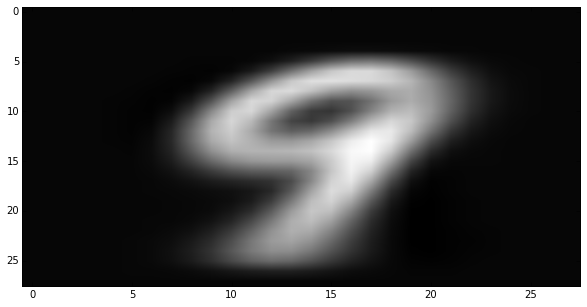

(28L, 28L)


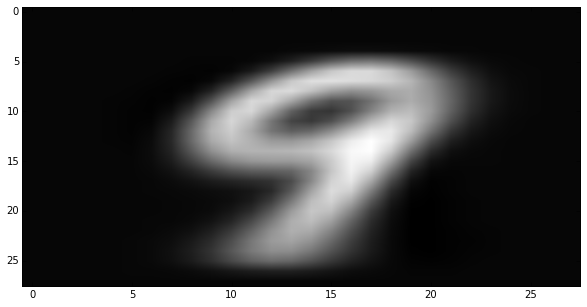

(28L, 28L)


In [44]:
im = load_image( path )
plt.imshow(im, cmap=plt.cm.gray, aspect='normal')
plt.show()
print im.shape
v = vectorizeImage( im )
# print v
# print len(v)
# print 28*28
I=imageFromVector( v )
plt.imshow(I, cmap=plt.cm.gray, aspect='normal')
plt.show()
print I.shape